# Homework 2

Deadline: lab session in the week of **25-28.11.2024**
Each task is worth 1 point.

## 1. Maximization of Functions using Gradient Descent



**Task**:
- (a) Maximize the function $f(x) = -x^4 + 4x^2 - 2x + 1$, where $f: \mathbb{R} \to \mathbb{R}$, using gradient ascent. Implement the optimization using PyTorch and plot the convergence over iterations.
- (b) Maximize the function $f(x, y, z) = -x^2 - y^2 - z^2 + 2xy - yz + 3z$, where $f: \mathbb{R}^3 \to \mathbb{R}$, using gradient ascent. Implement the optimization using PyTorch and visualize the optimization path.


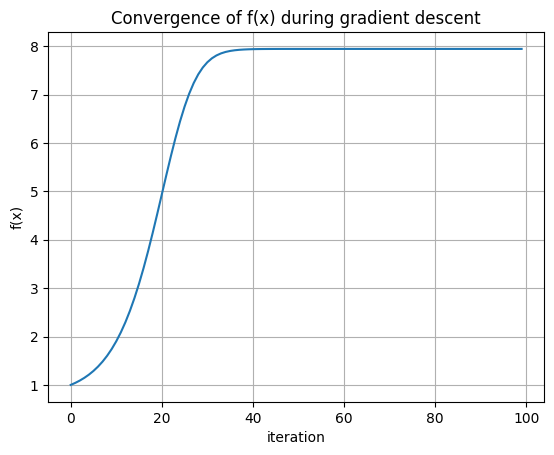

In [1]:
import torch
import matplotlib.pyplot as plt
def f(x):
  return -x**4 + 4*x**2 - 2*x + 1

def gradient_ascent(learning_rate, iterations):
  x = torch.tensor(0.0, requires_grad=True)

  f_values = []
  for _ in range(iterations):
    y = f(x)
    y.backward()
    with torch.no_grad():
      x += learning_rate * x.grad
      x.grad.zero_()
    f_values.append(y.item())
  return f_values


learning_rate = 0.01
iterations = 100

plt.plot(range(iterations), gradient_ascent(learning_rate, iterations), label='f(x)')
plt.title("Convergence of f(x) during gradient descent")
plt.xlabel("iteration")
plt.ylabel("f(x)")
plt.grid()
plt.show()



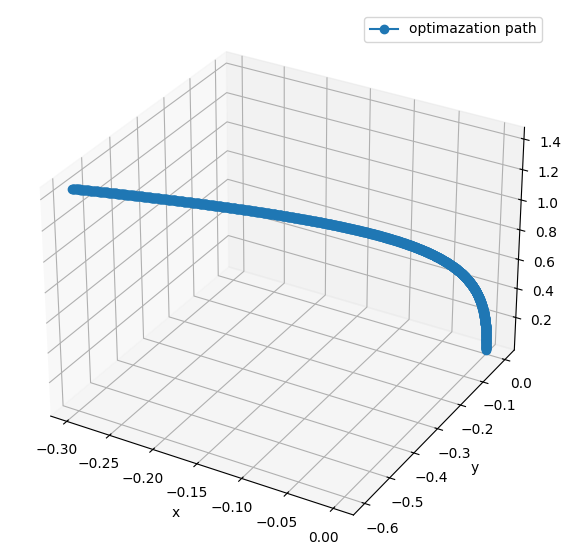

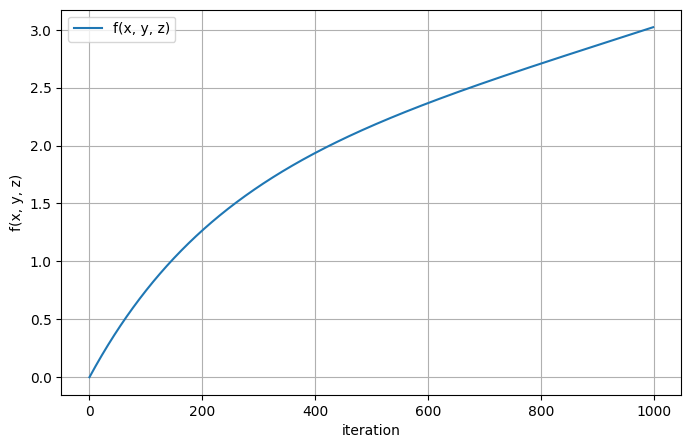

In [2]:
import torch
import matplotlib.pyplot as plt

def f(x, y, z):
  return -x**2 - y**2 - z**2 + 2*x*y - z*y + 3*z

def gradient_ascent3d(learning_rate, iterations):
  x = torch.tensor(0.0, requires_grad=True)
  y = torch.tensor(0.0, requires_grad=True)
  z = torch.tensor(0.0, requires_grad=True)
  f_values = []
  x_values, y_values, z_values = [], [], []

  for _ in range(iterations):
    fxyz = f(x, y, z)
    fxyz.backward()
    with torch.no_grad():
      x += learning_rate*x.grad
      y += learning_rate*y.grad
      z += learning_rate*z.grad
      x.grad.zero_()
      y.grad.zero_()
      z.grad.zero_()
    x_values.append(x.item())
    y_values.append(y.item())
    z_values.append(z.item())
    f_values.append(fxyz.item())
  return f_values, x_values, y_values, z_values

iterations = 1000
learning_rate = 0.001
f_values, x_values, y_values, z_values = gradient_ascent3d(learning_rate, iterations)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_values, y_values, z_values, marker='o', label='optimazation path')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(range(iterations), f_values, label='f(x, y, z)')
plt.xlabel('iteration')
plt.ylabel('f(x, y, z)')
plt.legend()
plt.grid()
plt.show()


## 2. Linear Regression in PyTorch


**Dataset**: Use the following code to generate a synthetic dataset with 100 samples, each with one feature:


In [3]:

import numpy as np
np.random.seed(0)
def gen():
  X = np.random.uniform(-10, 10, 100)
  epsilon = np.random.normal(0, 0.1, 100)
  y = 3 * X + 4 + epsilon
  return X, y


In [4]:
import torch.nn as nn
import torch.optim as optim

model = nn.Linear(1, 1)
crit = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
X, y = gen()

X = torch.from_numpy(X).reshape(-1, 1).float()
y = torch.from_numpy(y).reshape(-1, 1).float()
epochs = 300

def train():
  loss_his = []
  for epoch in range(epochs):
    predictions = model(X)
    loss = crit(predictions, y)
    loss_his.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  with torch.no_grad():
    predictions = model(X)
  return predictions, loss_his



**Task**: Implement a linear regression model using PyTorch to predict the target variable $y$. Train the model to minimize the Mean Squared Error (MSE).


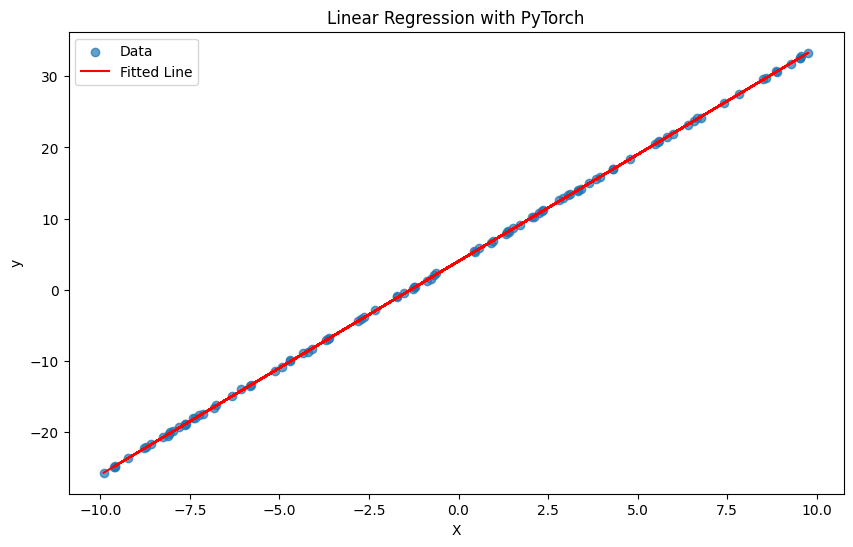

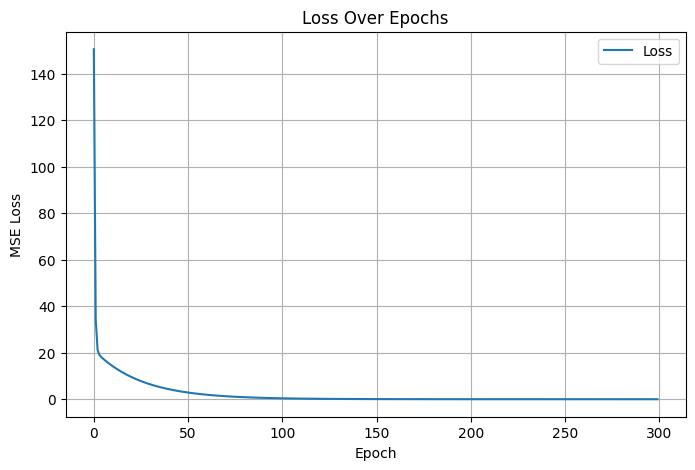

In [5]:
# Plot training data and the fitted line
predictions, loss_his = train()
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label="Data", alpha=0.7)
plt.plot(X, predictions, color="red", label="Fitted Line")
plt.title("Linear Regression with PyTorch")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Plot the loss over epochs
plt.figure(figsize=(8, 5))
plt.plot(range(epochs), loss_his, label="Loss")
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid()
plt.legend()
plt.show()

## 3. Learning Rate Analysis


**Dataset**: Use the same dataset from Problem 2.

**Task**: Modify the `gradient_descent()` function to include different learning rates (0.01, 0.1, 1.0). Visualize the convergence behaviors of gradient descent with each learning rate.


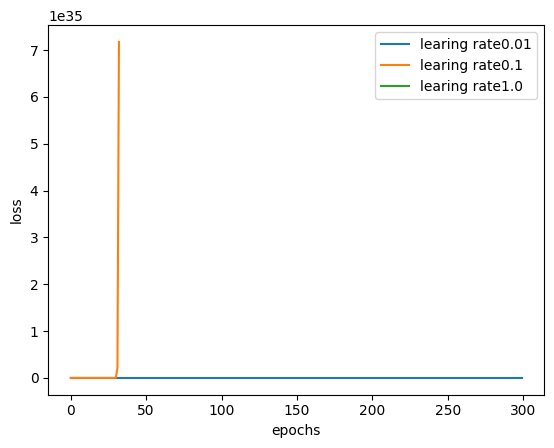

In [6]:
learning_rates = [0.01, 0.1, 1.0]
for lr in learning_rates:
  optimizer = optim.SGD(model.parameters(), lr=lr)
  _, loss_his = train()
  plt.plot(loss_his, label=f"learing rate{lr}")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()
  

## 4. Polynomial Regression Extension


**Dataset**: Use the following code to create a dataset of 100 samples:


In [7]:

np.random.seed(1)
X = np.random.uniform(-5, 5, 100)
epsilon = np.random.normal(0, 0.5, 100)
y = 3 * X**3 - 2 * X**2 + 5 + epsilon

In [8]:
X_tensor = torch.tensor(X, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

In [19]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(1, 1)
  def forward(self, x):
    return self.linear(x)
  
def train_model(model, X, y, epochs=300, learning_rate=0.01):
  criterion = nn.MSELoss()
  optimizer = optim.SGD(model.parameters(), lr=learning_rate)
  loss_his = []

  for epoch in range(epochs):
    predictions = model(X)
    loss = criterion(predictions, y)
    loss_his.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  return loss_his
linear_model = LinearRegressionModel()
linear_loss = train_model(linear_model, X_tensor, y_tensor)

In [10]:

class PolynomialRegressionModel(nn.Module):
  def __init__(self, dim):
    super().__init__()
    self.poly = nn.Linear(dim, 1)  

  def forward(self, x):
    return self.poly(x)

def generate_polynomial_features(X, dim):
  return torch.cat([X**i for i in range(1, dim+1)], dim=1)

def train_poly_model(X, y, epochs=500, learning_rate=0.0001):
  poly_model = PolynomialRegressionModel(3)
  
  criterion = nn.MSELoss()
  optimizer = optim.SGD(poly_model.parameters(), lr=learning_rate)
  
  loss_his = []
  
  for epoch in range(epochs):
    poly_model.train()
    predictions = poly_model(generate_polynomial_features(X, 3))
    loss = criterion(predictions, y)
    
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    loss_his.append(loss.item())
    
  return poly_model, loss_his

poly_model, poly_loss = train_poly_model(X_tensor, y_tensor)

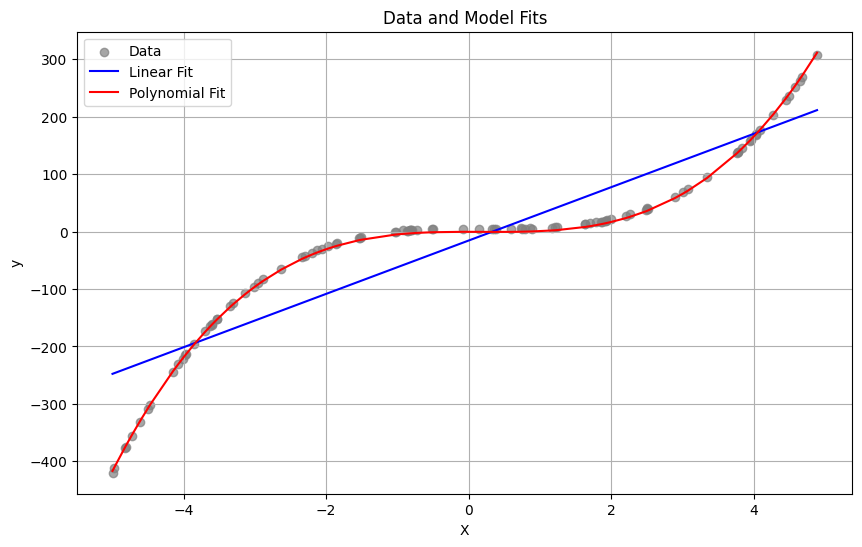

In [11]:
# Predictions Visualization
with torch.no_grad():
  # Sort input for smooth plotting
  X_sorted, indices = torch.sort(X_tensor, dim=0)
  linear_predictions = linear_model(X_sorted)
  poly_features_sorted = torch.cat([X_sorted, X_sorted**2, X_sorted**3], dim=1)
  poly_predictions = poly_model(poly_features_sorted)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, label="Data", alpha=0.7, color="gray")
plt.plot(X_sorted, linear_predictions, label="Linear Fit", color="blue")
plt.plot(X_sorted, poly_predictions, label="Polynomial Fit", color="red")
plt.title("Data and Model Fits")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()


**Task**: Implement polynomial regression of degree 3 using PyTorch. Train the model and compare the training loss to that of a simple linear regression model.


## 5. Overfitting and Regularization


**Dataset**: Use the following code to generate a dataset with 150 samples:


In [12]:

np.random.seed(2)
X = np.random.uniform(-10, 10, 150)
epsilon = np.random.normal(0, 1, 150)
y = 2 * X**2 + 3 * X + 1 + epsilon


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)
X_train = torch.tensor(X_train, dtype=torch.float32).view(-1, 1)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_val = torch.tensor(X_val, dtype=torch.float32).view(-1, 1)
y_val = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

def train_model(model, X, y, X_val, y_val, epochs=100, learning_rate=0.01, l2_lambda=0.0):
  criterion = nn.MSELoss()
  optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=l2_lambda)  # L2 regularization via weight_decay
  train_loss_history = []
  val_loss_history = []

  for epoch in range(epochs):
      # Forward pass
    model.train()
    predictions = model(X)
    loss = criterion(predictions, y)
    train_loss_history.append(loss.item())

    # Validation loss
    model.eval()
    with torch.no_grad():
      val_predictions = model(X_val)
      val_loss = criterion(val_predictions, y_val)
      val_loss_history.append(val_loss.item())

      # Backward pass
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

  return train_loss_history, val_loss_history

torch.Size([120, 1]) torch.Size([120, 1]) torch.Size([30, 1]) torch.Size([30, 1])


In [14]:
linear_model = LinearRegressionModel()
linear_train_loss, linear_val_loss = train_model(linear_model, X_train, y_train, X_val, y_val)

X_train_poly = generate_polynomial_features(X_train, 10)
X_val_poly = generate_polynomial_features(X_val, 10)


poly_model = PolynomialRegressionModel(10)
poly_train_loss, poly_val_loss = train_model(poly_model, X_train_poly, y_train, X_val_poly, y_val)

l2_lambda = 0.01
poly_model_l2 = PolynomialRegressionModel(10)
poly_train_loss_l2, poly_val_loss_l2 = train_model(poly_model_l2, X_train_poly, y_train, X_val_poly, y_val, l2_lambda=l2_lambda)

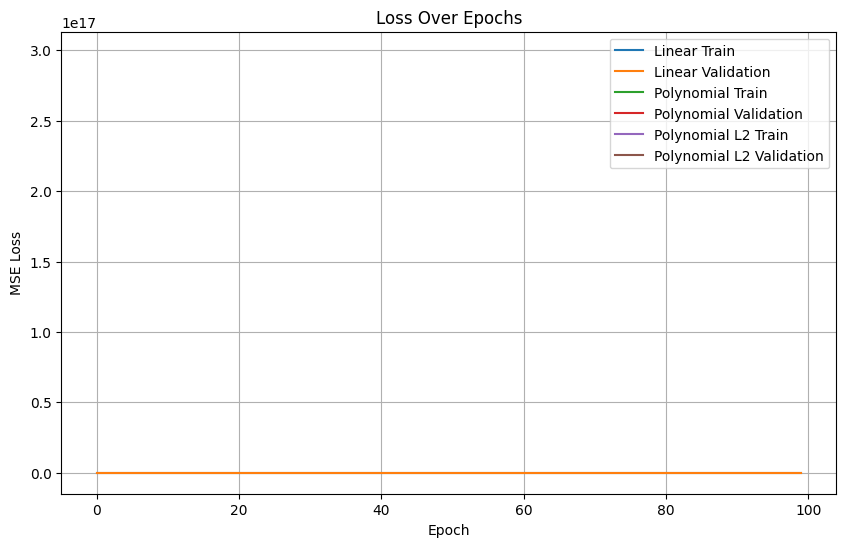

In [15]:
## plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(linear_train_loss, label="Linear Train")
plt.plot(linear_val_loss, label="Linear Validation")
plt.plot(poly_train_loss, label="Polynomial Train")
plt.plot(poly_val_loss, label="Polynomial Validation")
plt.plot(poly_train_loss_l2, label="Polynomial L2 Train")
plt.plot(poly_val_loss_l2, label="Polynomial L2 Validation")
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid()
plt.show()


**Task**: Fit two models: (i) a linear regression model, and (ii) a polynomial regression model of degree 10. Compare the training and validation performance of both models. Apply L2 regularization to the polynomial model and observe the effect on overfitting.


## 6. Custom Gradient Descent in PyTorch


**Dataset**: Use the same dataset from Problem 2.

**Task**: Implement a custom gradient descent algorithm without using an optimizer from `torch.optim`. Train a linear regression model using this custom implementation and compare the training results with those obtained using PyTorch's `SGD` optimizer.


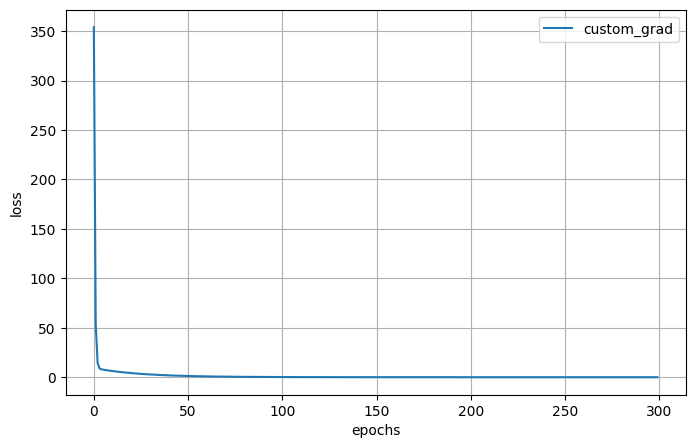

In [16]:
X, y = gen()
X = torch.from_numpy(X).reshape(-1, 1).float()
y = torch.from_numpy(y).reshape(-1, 1).float()
def custom_grad(X, y):
  model = LinearRegressionModel()
  criterion = nn.MSELoss()
  epochs = 300
  learning_rate = 0.01
  loss_his = []
  for epoch in range(epochs):
    predictions = model(X)
    loss = criterion(predictions, y)
    loss_his.append(loss.item())
    model.zero_grad()
    loss.backward()
    with torch.no_grad():
      for param in model.parameters():
        param -= learning_rate * param.grad
  return loss_his

loss_his = custom_grad(X, y)
plt.figure(figsize=(8, 5))
plt.plot(range(300), loss_his, label="custom_grad")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.grid()
plt.show()

## 7. Dataset Size and Convergence


**Dataset**: Use the following code to create three datasets of sizes 50, 100, and 500 samples:


In [17]:

np.random.seed(3)
sizes = [50, 100, 500]
datasets = []
for size in sizes:
    X = np.random.uniform(-10, 10, size)
    epsilon = np.random.normal(0, 0.2, size)
    y = 4 * X - 3 + epsilon
    datasets.append((X, y))

datasets_torch = []

for data in datasets:
  X_tensor = torch.tensor(data[0], dtype=torch.float32).view(-1, 1)
  y_tensor = torch.tensor(data[1], dtype=torch.float32).view(-1, 1)
  datasets_torch.append((X_tensor, y_tensor))


**Task**: Train linear regression models on each dataset using PyTorch. Compare the convergence rates of gradient descent for each dataset size by plotting the training loss over epochs.


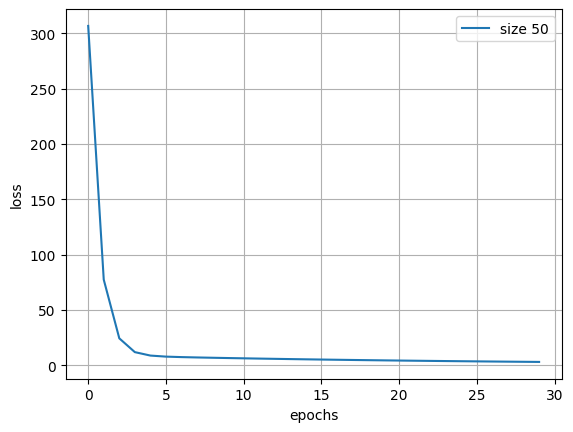

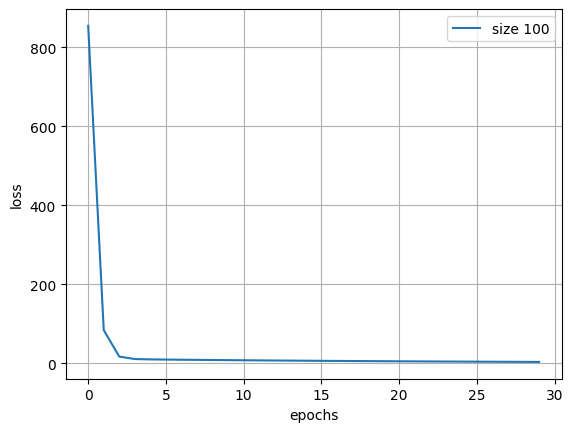

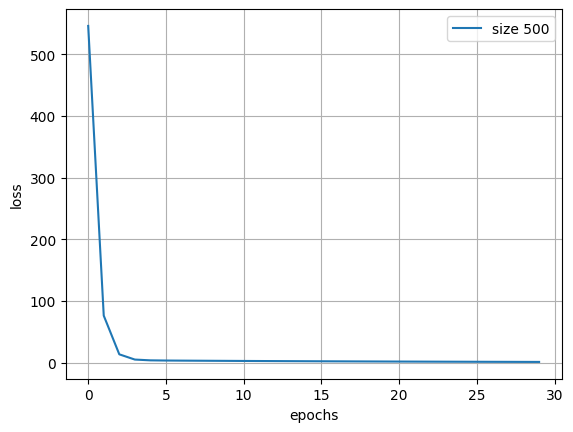

In [21]:
for data in datasets_torch:
  X, y = data
  model = LinearRegressionModel()
  loss_his = train_model(model, X, y, epochs=30)
  plt.plot(loss_his, label=f"size {len(X)}")
  plt.xlabel("epochs")
  plt.ylabel("loss")
  plt.legend()
  plt.grid()
  plt.show()

## 8. Effect of Model Complexity on Overfitting


**Dataset**: Use the following code to generate a dataset of 200 samples:


In [ ]:

np.random.seed(4)
X = np.random.uniform(-5, 5, 200)
epsilon = np.random.normal(0, 0.5, 200)
y = 2 * X**2 + X + epsilon



**Task**: Fit polynomial regression models of degrees 5 and 15 to the dataset. Plot the training and validation errors for both models.


## 9. Gradient Descent for Non-linear Data


**Dataset**: Use the following code to generate a dataset of 100 samples:


In [ ]:

np.random.seed(5)
X = np.random.uniform(-2 * np.pi, 2 * np.pi, 100)
epsilon = np.random.normal(0, 0.1, 100)
y = np.sin(X) + epsilon



**Task**: Implement gradient descent to fit a linear model to this dataset. Discuss the challenges and limitations of fitting a linear model to non-linear data.


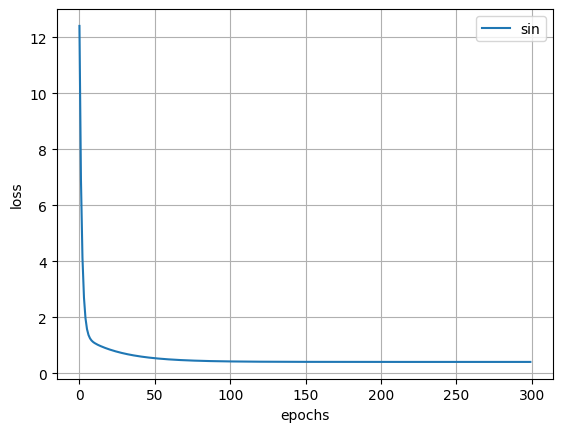

In [ ]:
model = LinearRegressionModel()
X = torch.tensor(X, dtype=torch.float32).view(-1, 1)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)
loss_his = train_model(model, X, y)
plt.plot(loss_his, label="sin")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.grid()
plt.show()


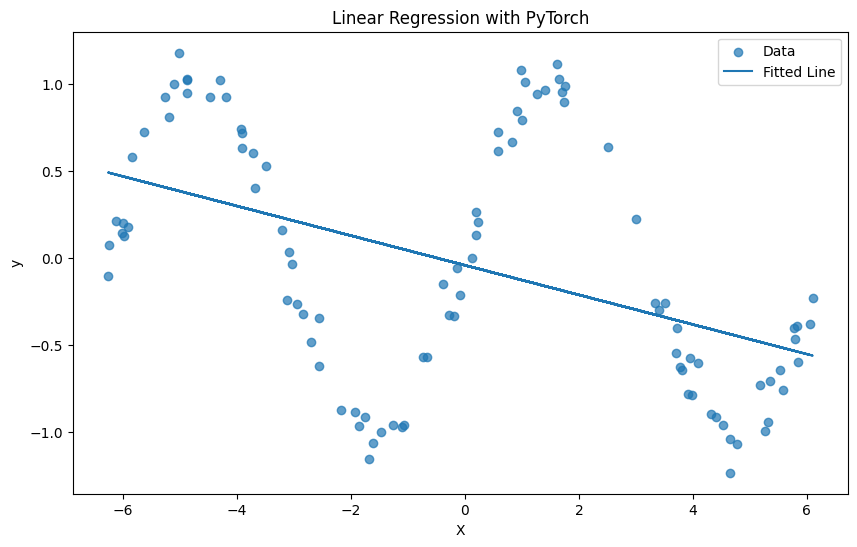

In [ ]:
model.eval()
with torch.no_grad():
  predictions = model(X)
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label="Data", alpha=0.7)
plt.plot(X, predictions, label="Fitted Line")
plt.title("Linear Regression with PyTorch")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()